In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/')

import pandas as pd

In [2]:
from src import vehicular_data_columns, subject_data_columns, neurophysiological_data_columns, video_data_analysis_columns
from src.preprocess import remove_invalid_data

In [3]:

# Paths to the files
feature_track_path = '../data/Feature_Track.xlsx'
feature_simulation_path = '../data/Feature_Simulation.xlsx'

# Reading the datasets
feature_track_df = pd.read_excel(feature_track_path)
feature_simulation_df = pd.read_excel(feature_simulation_path)


## Check Lap Events
this dont work, skip

In [4]:
# # tried to check if you can sequentially compare subject-lap pair -> but no
# # Redefining the event_columns list as provided by the user
# event_columns = [
#     "straight", "roundabout_entry", "roundabout_exit", "zebra_crossing",
#     "left_turn", "u_turn", "bypass_dummy", "car", "pedestrian",
#     "traffic_light", "narrow_road", "dummy", "bend"
# ]
#
# # Filter the dataframes to include only the relevant columns for comparison
# relevant_columns = ['subject', 'lap', 'start_time'] + event_columns
# track_filtered = feature_track_data[relevant_columns]
# simulation_filtered = feature_simulation_data[relevant_columns]
#
# # Processing both datasets
# # Setting the index to subject, lap, and start_time for both datasets
# track_indexed = track_filtered.set_index(['subject', 'lap', 'start_time'])
# simulation_indexed = simulation_filtered.set_index(['subject', 'lap', 'start_time'])
#
# # Function to compare rows across all subjects for a given lap and start_time
# # Function to create a nested dictionary for lap and start_time with lists of events per subject
# def create_events_dict(df):
#     df = df.reset_index().set_index(['subject', 'lap'])
#     df.sort_values(by=['subject', 'lap', 'start_time'], inplace=True)
#     df = df.reset_index()
#
#     df['start_time_index'] = df.groupby(['subject', 'lap']).cumcount()
#     df = df.reset_index().set_index(['subject', 'lap', 'start_time_index'])
#     display(df)
#
#     events_dict = {}
#
#     for (subject, lap, start_time), row in df.iterrows():
#         if lap not in events_dict:
#             events_dict[lap] = {}
#         if start_time not in events_dict[lap]:
#             events_dict[lap][start_time] = []
#
#         # Adding the events list for this subject at this lap and start_time
#         events_dict[lap][start_time].append(row[event_columns].tolist())
#
#     return events_dict
#
# # Creating the nested dictionary for both datasets
# track_events_dict = create_events_dict(track_indexed)
# simulation_events_dict = create_events_dict(simulation_indexed)
# result = {}
# for lap in track_events_dict.keys():
#     result[lap] = {}
#     for ti in track_events_dict[lap].keys():
#         is_matched = True
#         result[lap][ti] = is_matched
#         current = track_events_dict[lap][ti][0]
#         for i in range(1, len(track_events_dict[lap][ti])):
#             if current != track_events_dict[lap][ti][i]:
#                 print(lap, ti, 0, i)
#                 print('current', current)
#                 print('comp', track_events_dict[lap][ti][i])
#                 is_matched = False
#         result[lap][ti] = is_matched
#


## Check invalid columns

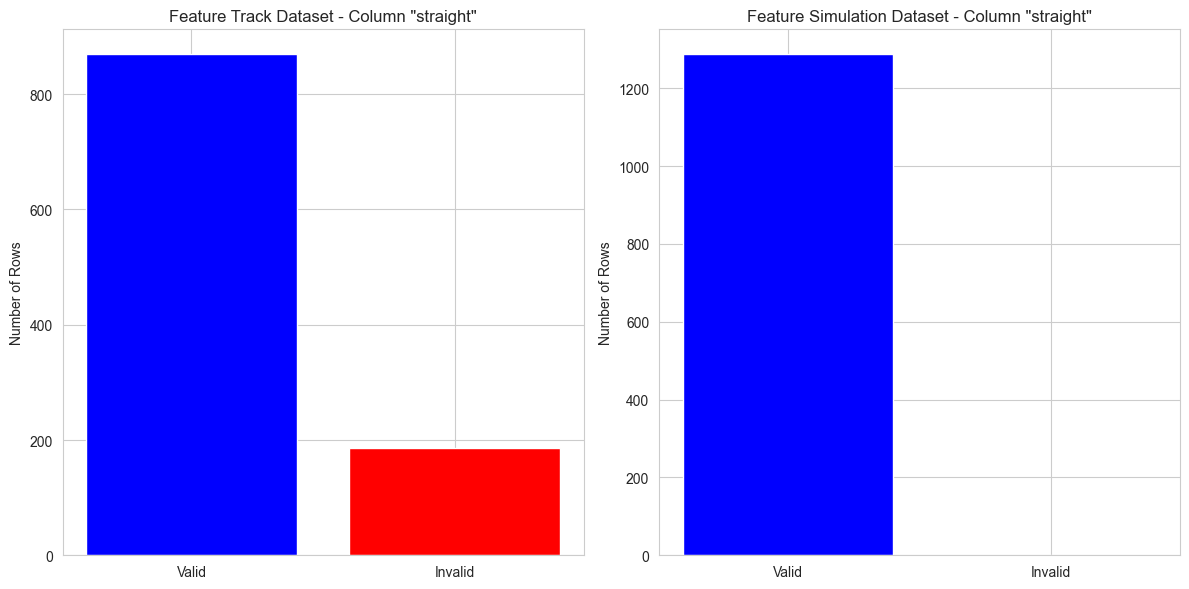

In [5]:
import matplotlib.pyplot as plt

# Checking for invalid values in 'straight' column for both datasets
# Valid values are either 0 or 1
invalid_straight_track = feature_track_df[~feature_track_df['straight'].isin([0, 1])]
invalid_straight_simulation = feature_simulation_df[~feature_simulation_df['straight'].isin([0, 1])]

# Counting valid and invalid rows for 'straight' column in both datasets
valid_invalid_counts_track = {'Valid': len(feature_track_df) - len(invalid_straight_track), 'Invalid': len(invalid_straight_track)}
valid_invalid_counts_simulation = {'Valid': len(feature_simulation_df) - len(invalid_straight_simulation), 'Invalid': len(invalid_straight_simulation)}

# Plotting the results in a bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(valid_invalid_counts_track.keys(), valid_invalid_counts_track.values(), color=['blue', 'red'])
ax[0].set_title('Feature Track Dataset - Column "straight"')
ax[0].set_ylabel('Number of Rows')

ax[1].bar(valid_invalid_counts_simulation.keys(), valid_invalid_counts_simulation.values(), color=['blue', 'red'])
ax[1].set_title('Feature Simulation Dataset - Column "straight"')
ax[1].set_ylabel('Number of Rows')

plt.tight_layout()
plt.show()


In [6]:
# Function to calculate valid and invalid rows for each column in a DataFrame
def calculate_valid_invalid_rows(df):
    valid_invalid_counts = {}
    for column in df.columns:
        valid_count = df[column].notna().sum()
        invalid_count = df[column].isna().sum()
        if invalid_count > 0:  # Only consider columns with invalid (NaN) values
            valid_invalid_counts[column] = {'Valid': valid_count, 'Invalid': invalid_count}
    return valid_invalid_counts

# Calculate valid and invalid rows for both datasets
valid_invalid_counts_track = calculate_valid_invalid_rows(feature_track_df)
valid_invalid_counts_simulation = calculate_valid_invalid_rows(feature_simulation_df)

# Display the results
valid_invalid_counts_track, valid_invalid_counts_simulation


({'max_speed': {'Valid': 1012, 'Invalid': 44},
  'avg_speed': {'Valid': 1012, 'Invalid': 44},
  'std_speed': {'Valid': 1012, 'Invalid': 44},
  'hr': {'Valid': 711, 'Invalid': 345},
  'hrv_lf': {'Valid': 711, 'Invalid': 345},
  'hrv_hf': {'Valid': 711, 'Invalid': 345},
  'hrv_lfhf_ratio': {'Valid': 711, 'Invalid': 345},
  'gsr_tonic': {'Valid': 816, 'Invalid': 240},
  'gsr_phasic': {'Valid': 816, 'Invalid': 240},
  'gsr_peaks': {'Valid': 816, 'Invalid': 240},
  'EBRmean': {'Valid': 717, 'Invalid': 339},
  'BDmean': {'Valid': 715, 'Invalid': 341},
  'ThetaFrontal': {'Valid': 809, 'Invalid': 247},
  'ThetaParietal': {'Valid': 809, 'Invalid': 247},
  'AlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'AlphaParietal': {'Valid': 809, 'Invalid': 247},
  'LowerAlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'LowerAlphaParietal': {'Valid': 809, 'Invalid': 247},
  'UpperAlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'UpperAlphaParietal': {'Valid': 809, 'Invalid': 247},
  'BetaFrontal': {'Valid

## Preprocessing to remove invalid data

In [7]:
# Example usage
cleaned_feature_track = remove_invalid_data(
    feature_track_df,
    columns_with_defined_valid_values={'straight': [0, 1]},
)

cleaned_feature_simulation = remove_invalid_data(
    feature_simulation_df,
    columns_with_defined_valid_values={'straight': [0, 1]},
)


## PCA Comparative Analysis

In [8]:
from src.plots import compare_datasets_with_pca

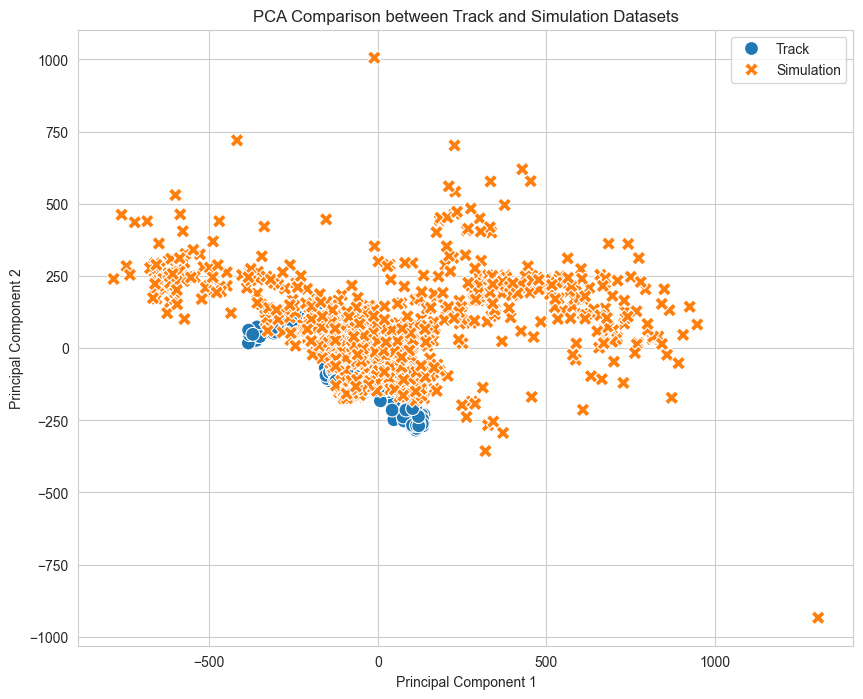

In [9]:
compare_datasets_with_pca(cleaned_feature_track, cleaned_feature_simulation, comparison_columns=vehicular_data_columns + neurophysiological_data_columns, label_column=None)


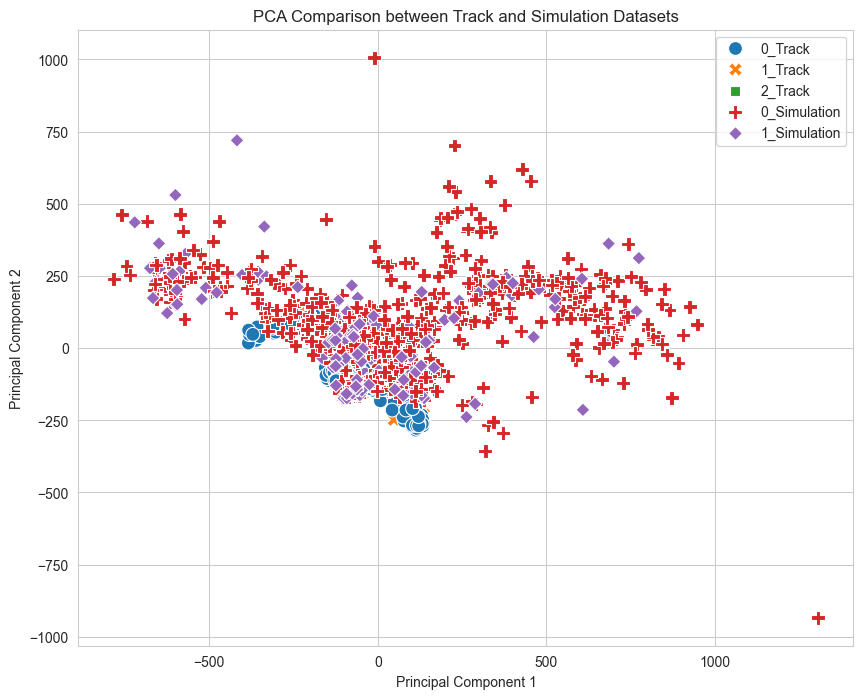

In [10]:
compare_datasets_with_pca(cleaned_feature_track, cleaned_feature_simulation, comparison_columns=vehicular_data_columns + neurophysiological_data_columns, label_column="risk_evaluation")


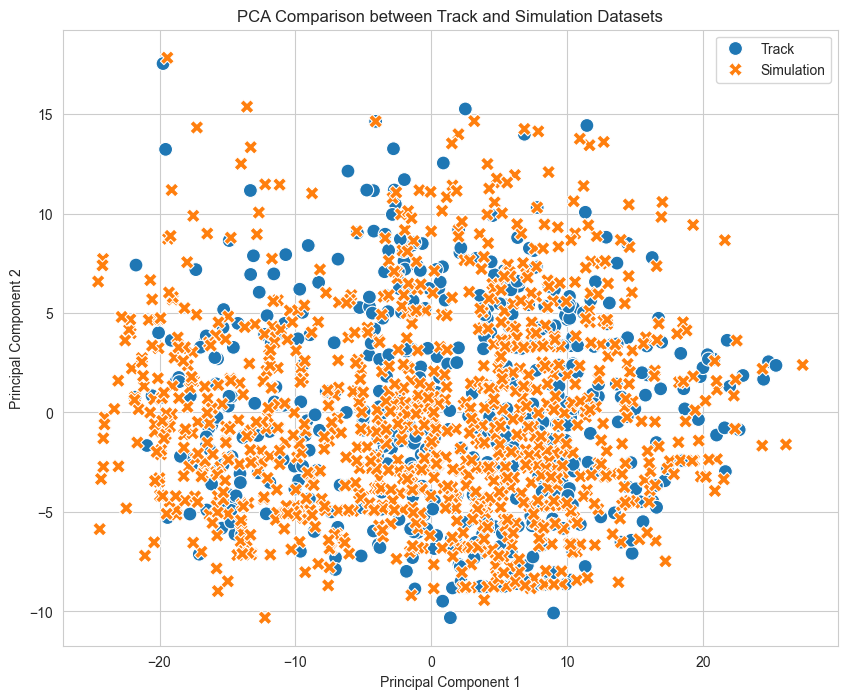

In [11]:
compare_datasets_with_pca(cleaned_feature_track, cleaned_feature_simulation, comparison_columns=neurophysiological_data_columns)


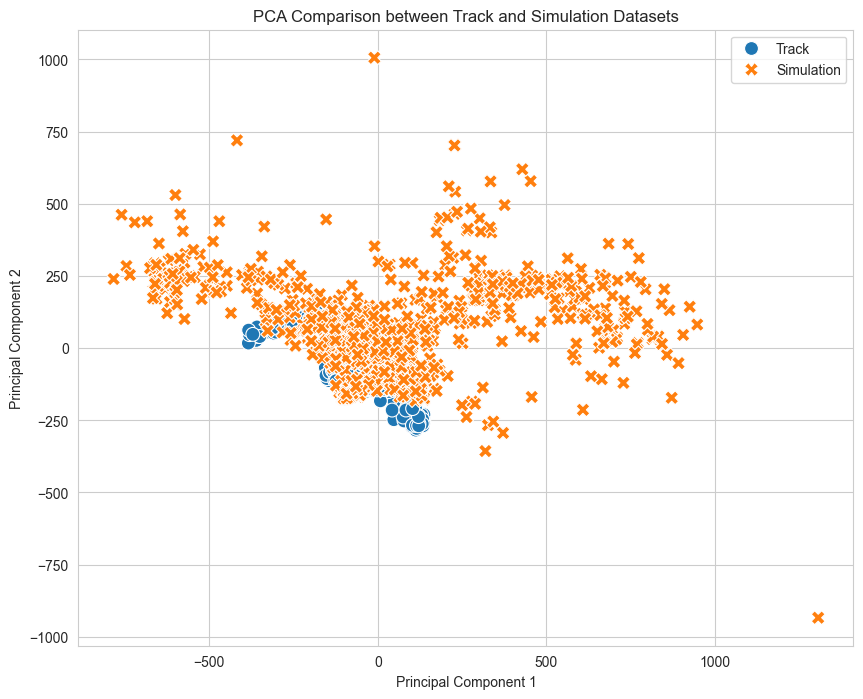

In [12]:
compare_datasets_with_pca(cleaned_feature_track, cleaned_feature_simulation, comparison_columns=vehicular_data_columns)


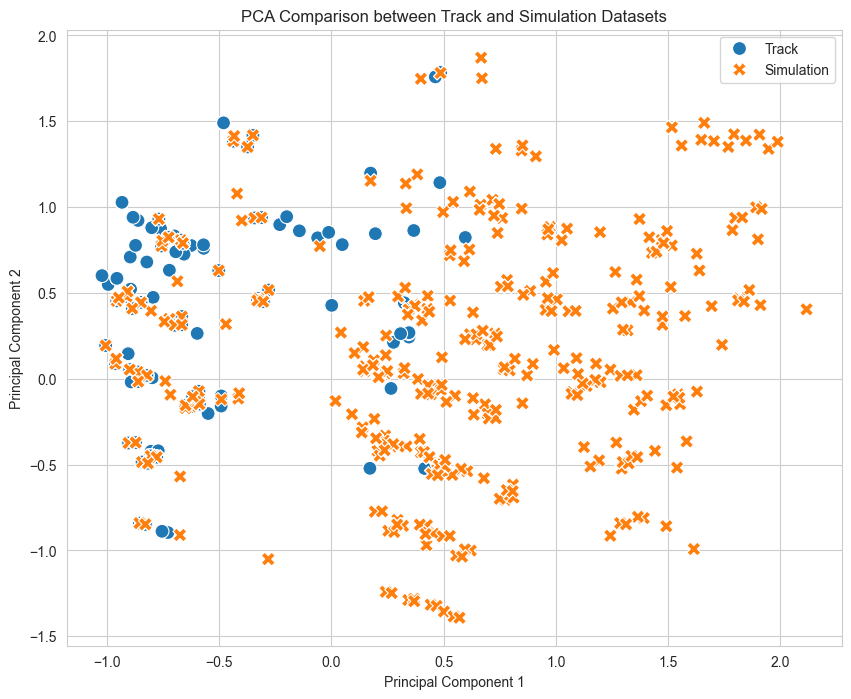

In [13]:
compare_datasets_with_pca(cleaned_feature_track, cleaned_feature_simulation, comparison_columns=video_data_analysis_columns)


In [14]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

def train_one_class_svm_anomaly_detection(train_df, validation_df, feature_columns, label_column='risk_evaluation'):
    # Prepare the data
    # Negative data points are considered 'normal'
    normal_data = train_df[train_df[label_column] == 0][feature_columns]

    # Train the One-Class SVM
    oc_svm_model = OneClassSVM(kernel ='sigmoid', nu=0.01)  # nu is an upper bound on the fraction of training errors
    oc_svm_model.fit(normal_data)

    # Function to evaluate the model
    def evaluate_model(data_df, true_label_column, plot_title):
        X = data_df[feature_columns]
        y_true = data_df[true_label_column].apply(lambda x: 1 if x > 0 else -1)
        y_pred = oc_svm_model.predict(X)

        # Convert prediction labels (-1 to 1 for anomaly, 1 to -1 for normal)
        y_pred = np.where(y_pred == 1, -1, 1)

        # Print confusion matrix and classification report
        cm = confusion_matrix(y_true, y_pred)
        print(cm)
        print(classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly']))

        # Plotting the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'], )
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title(plot_title)
        plt.show()

    # Evaluate on the test set (remaining part of the simulation data)
    print("Test Set Evaluation:")
    evaluate_model(train_df, label_column, "Test Set Evaluation")

    # Validate on the track data
    print("Validation Set Evaluation:")
    evaluate_model(validation_df, label_column, "Validation Set Evaluation")

# Example usage:
# train_one_class_svm_anomaly_detection(feature_simulation_df, feature_track_df, feature_columns=your_feature_columns)


Test Set Evaluation:
[[803   7]
 [181   4]]
              precision    recall  f1-score   support

      Normal       0.82      0.99      0.90       810
     Anomaly       0.36      0.02      0.04       185

    accuracy                           0.81       995
   macro avg       0.59      0.51      0.47       995
weighted avg       0.73      0.81      0.74       995



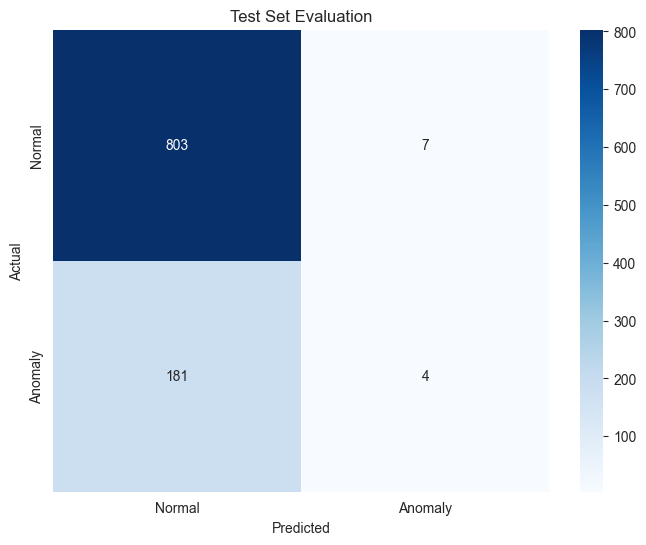

Validation Set Evaluation:
[[459  56]
 [ 21   3]]
              precision    recall  f1-score   support

      Normal       0.96      0.89      0.92       515
     Anomaly       0.05      0.12      0.07        24

    accuracy                           0.86       539
   macro avg       0.50      0.51      0.50       539
weighted avg       0.92      0.86      0.88       539



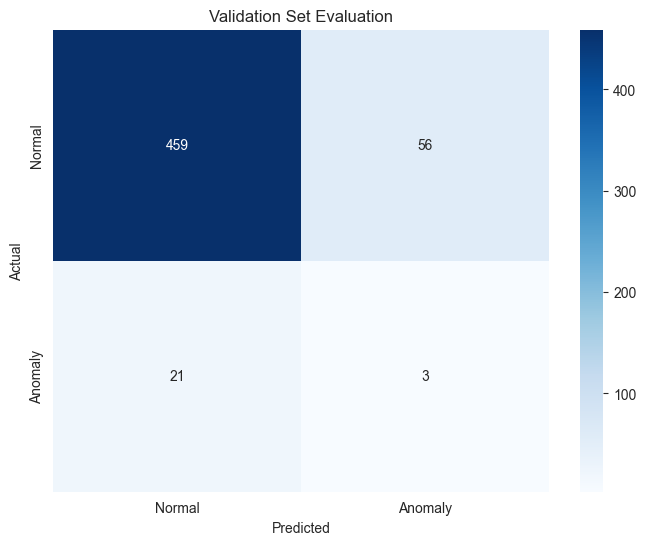

In [15]:
# Example usage:
columns = vehicular_data_columns + neurophysiological_data_columns + ['risk_evaluation']
train_one_class_svm_anomaly_detection(cleaned_feature_simulation[columns], cleaned_feature_track[columns], feature_columns=vehicular_data_columns + neurophysiological_data_columns, label_column='risk_evaluation')

In [16]:
from src.plots import plot_correlation_matrices

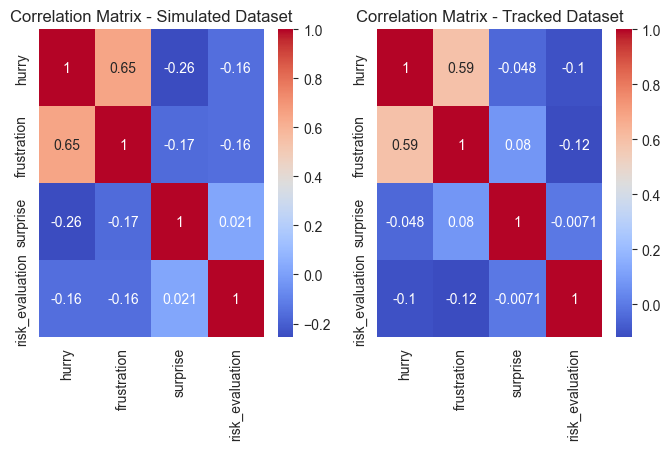

In [17]:
features = [
    'hurry',
    'frustration',
    'surprise',
    'risk_evaluation'
]
plot_correlation_matrices(simulated_df=feature_simulation_df, tracked_df=feature_track_df, features_to_correlate=features)


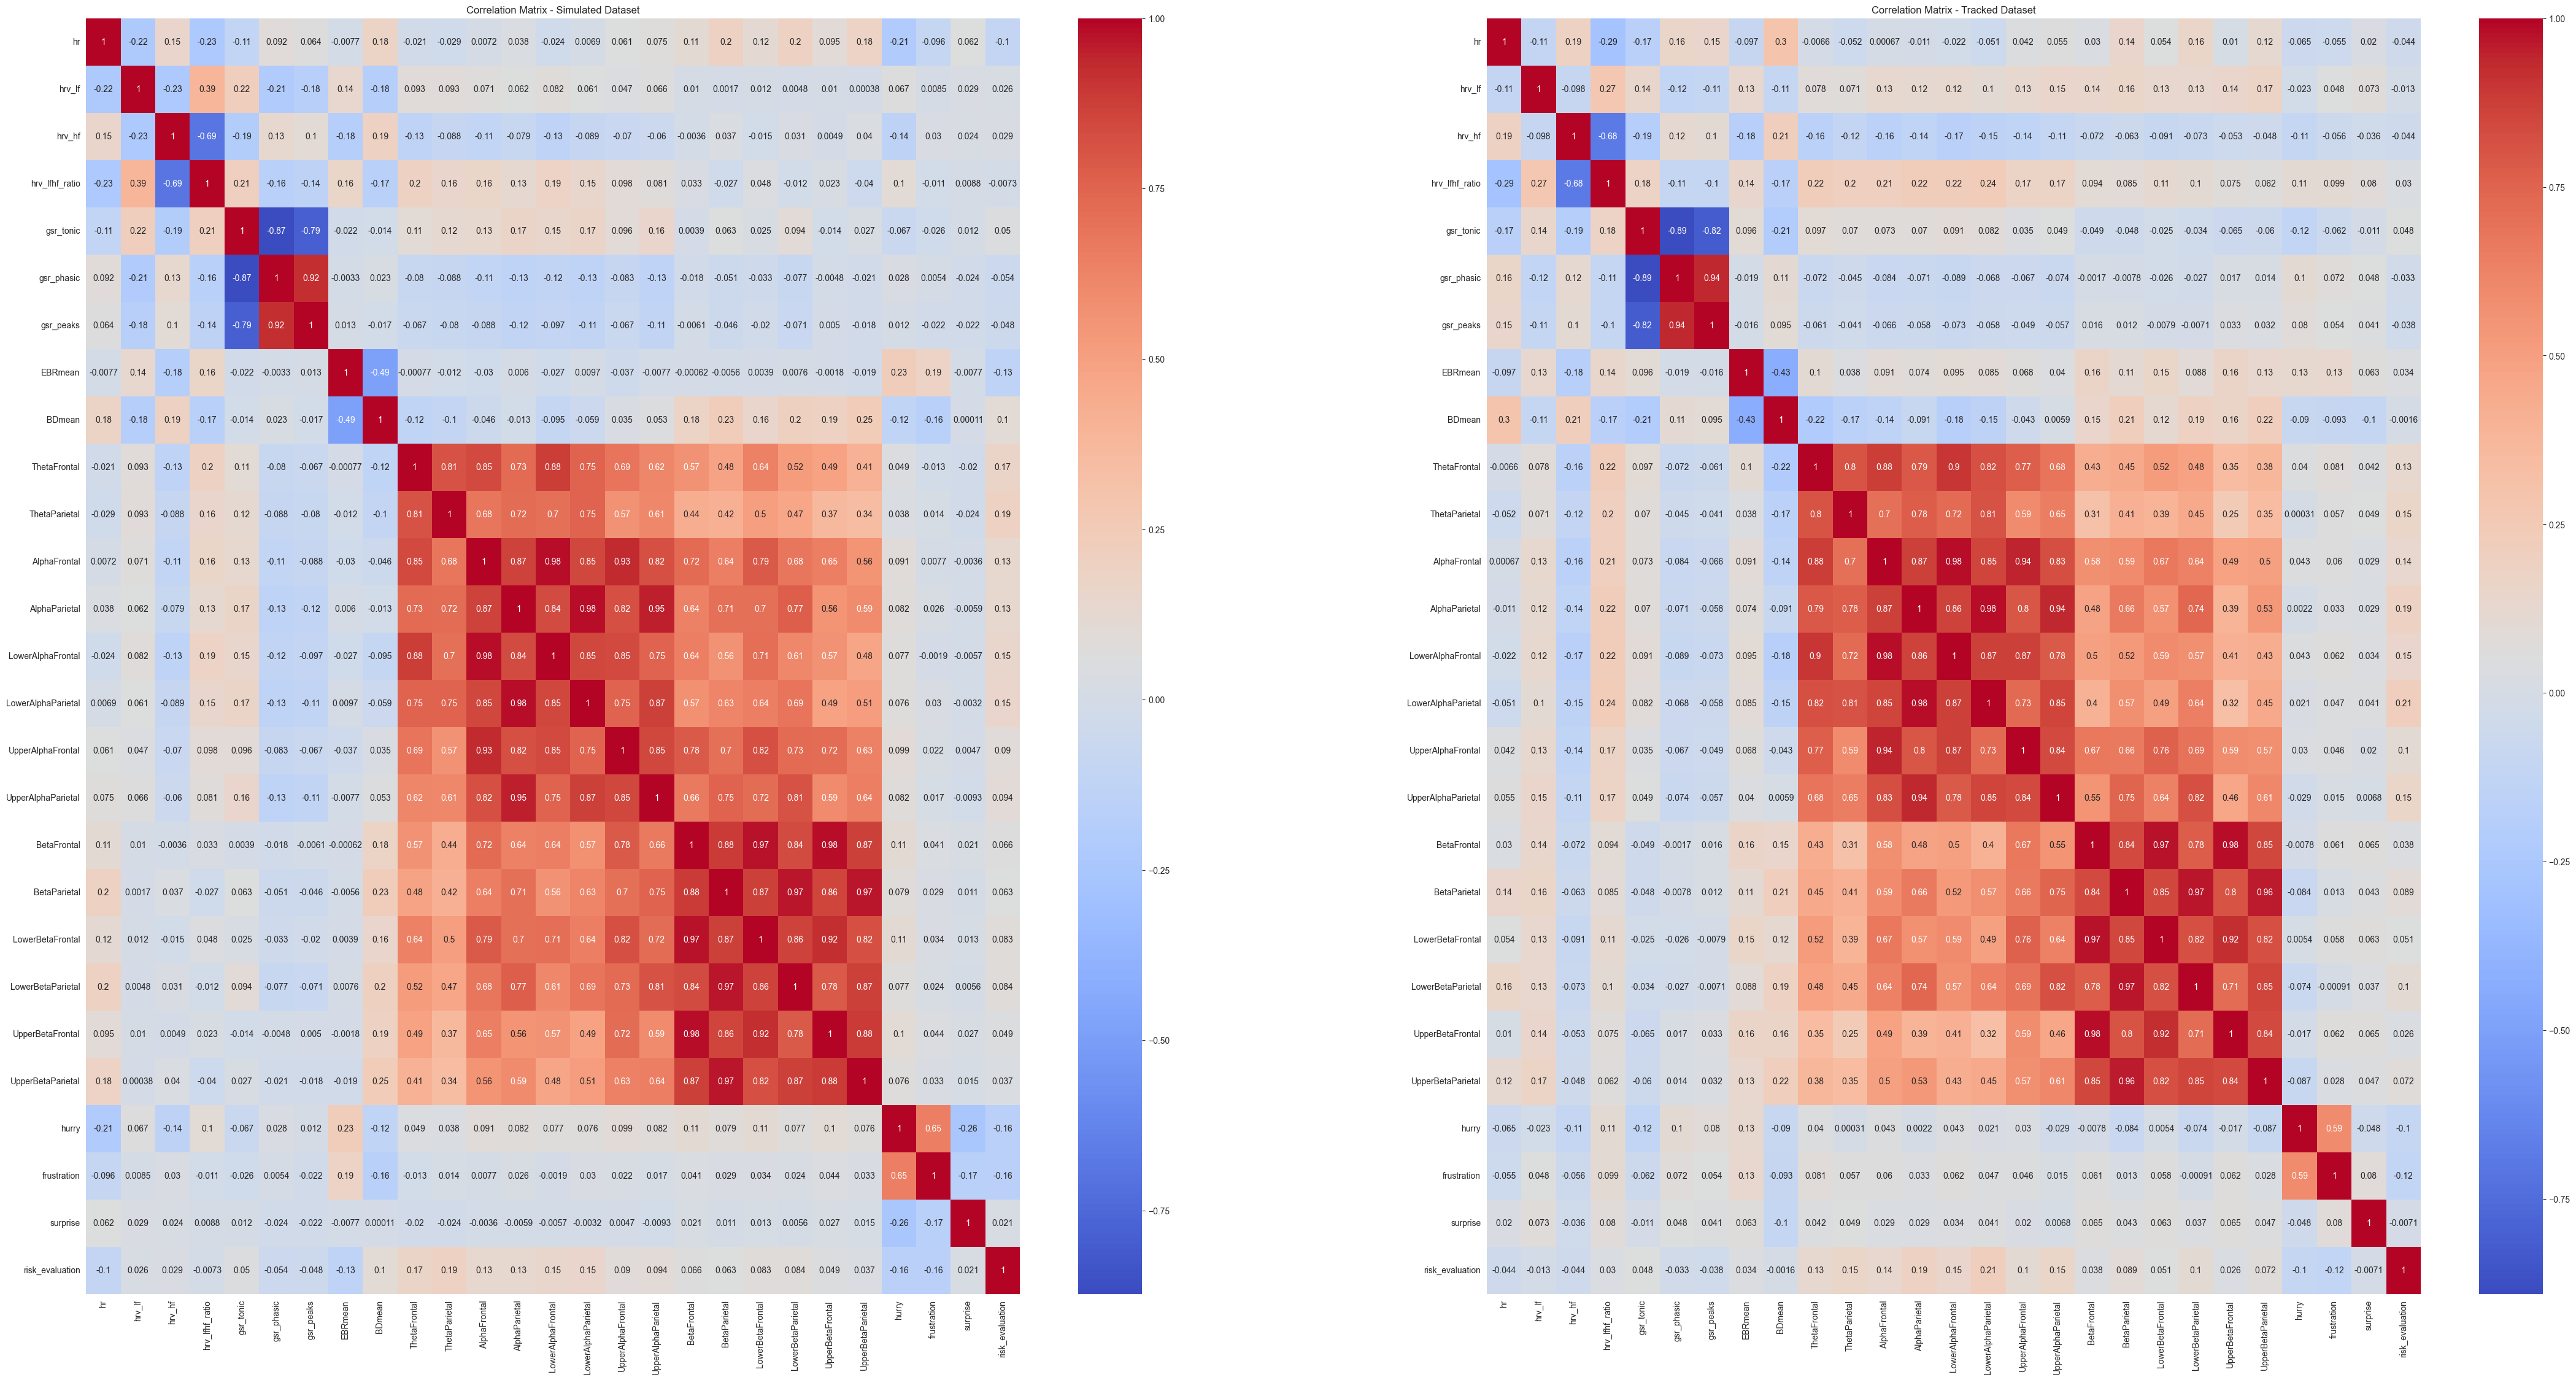

In [18]:
features = neurophysiological_data_columns + [
    'hurry',
    'frustration',
    'surprise',
    'risk_evaluation'
]
plot_correlation_matrices(simulated_df=feature_simulation_df, tracked_df=feature_track_df, features_to_correlate=features)


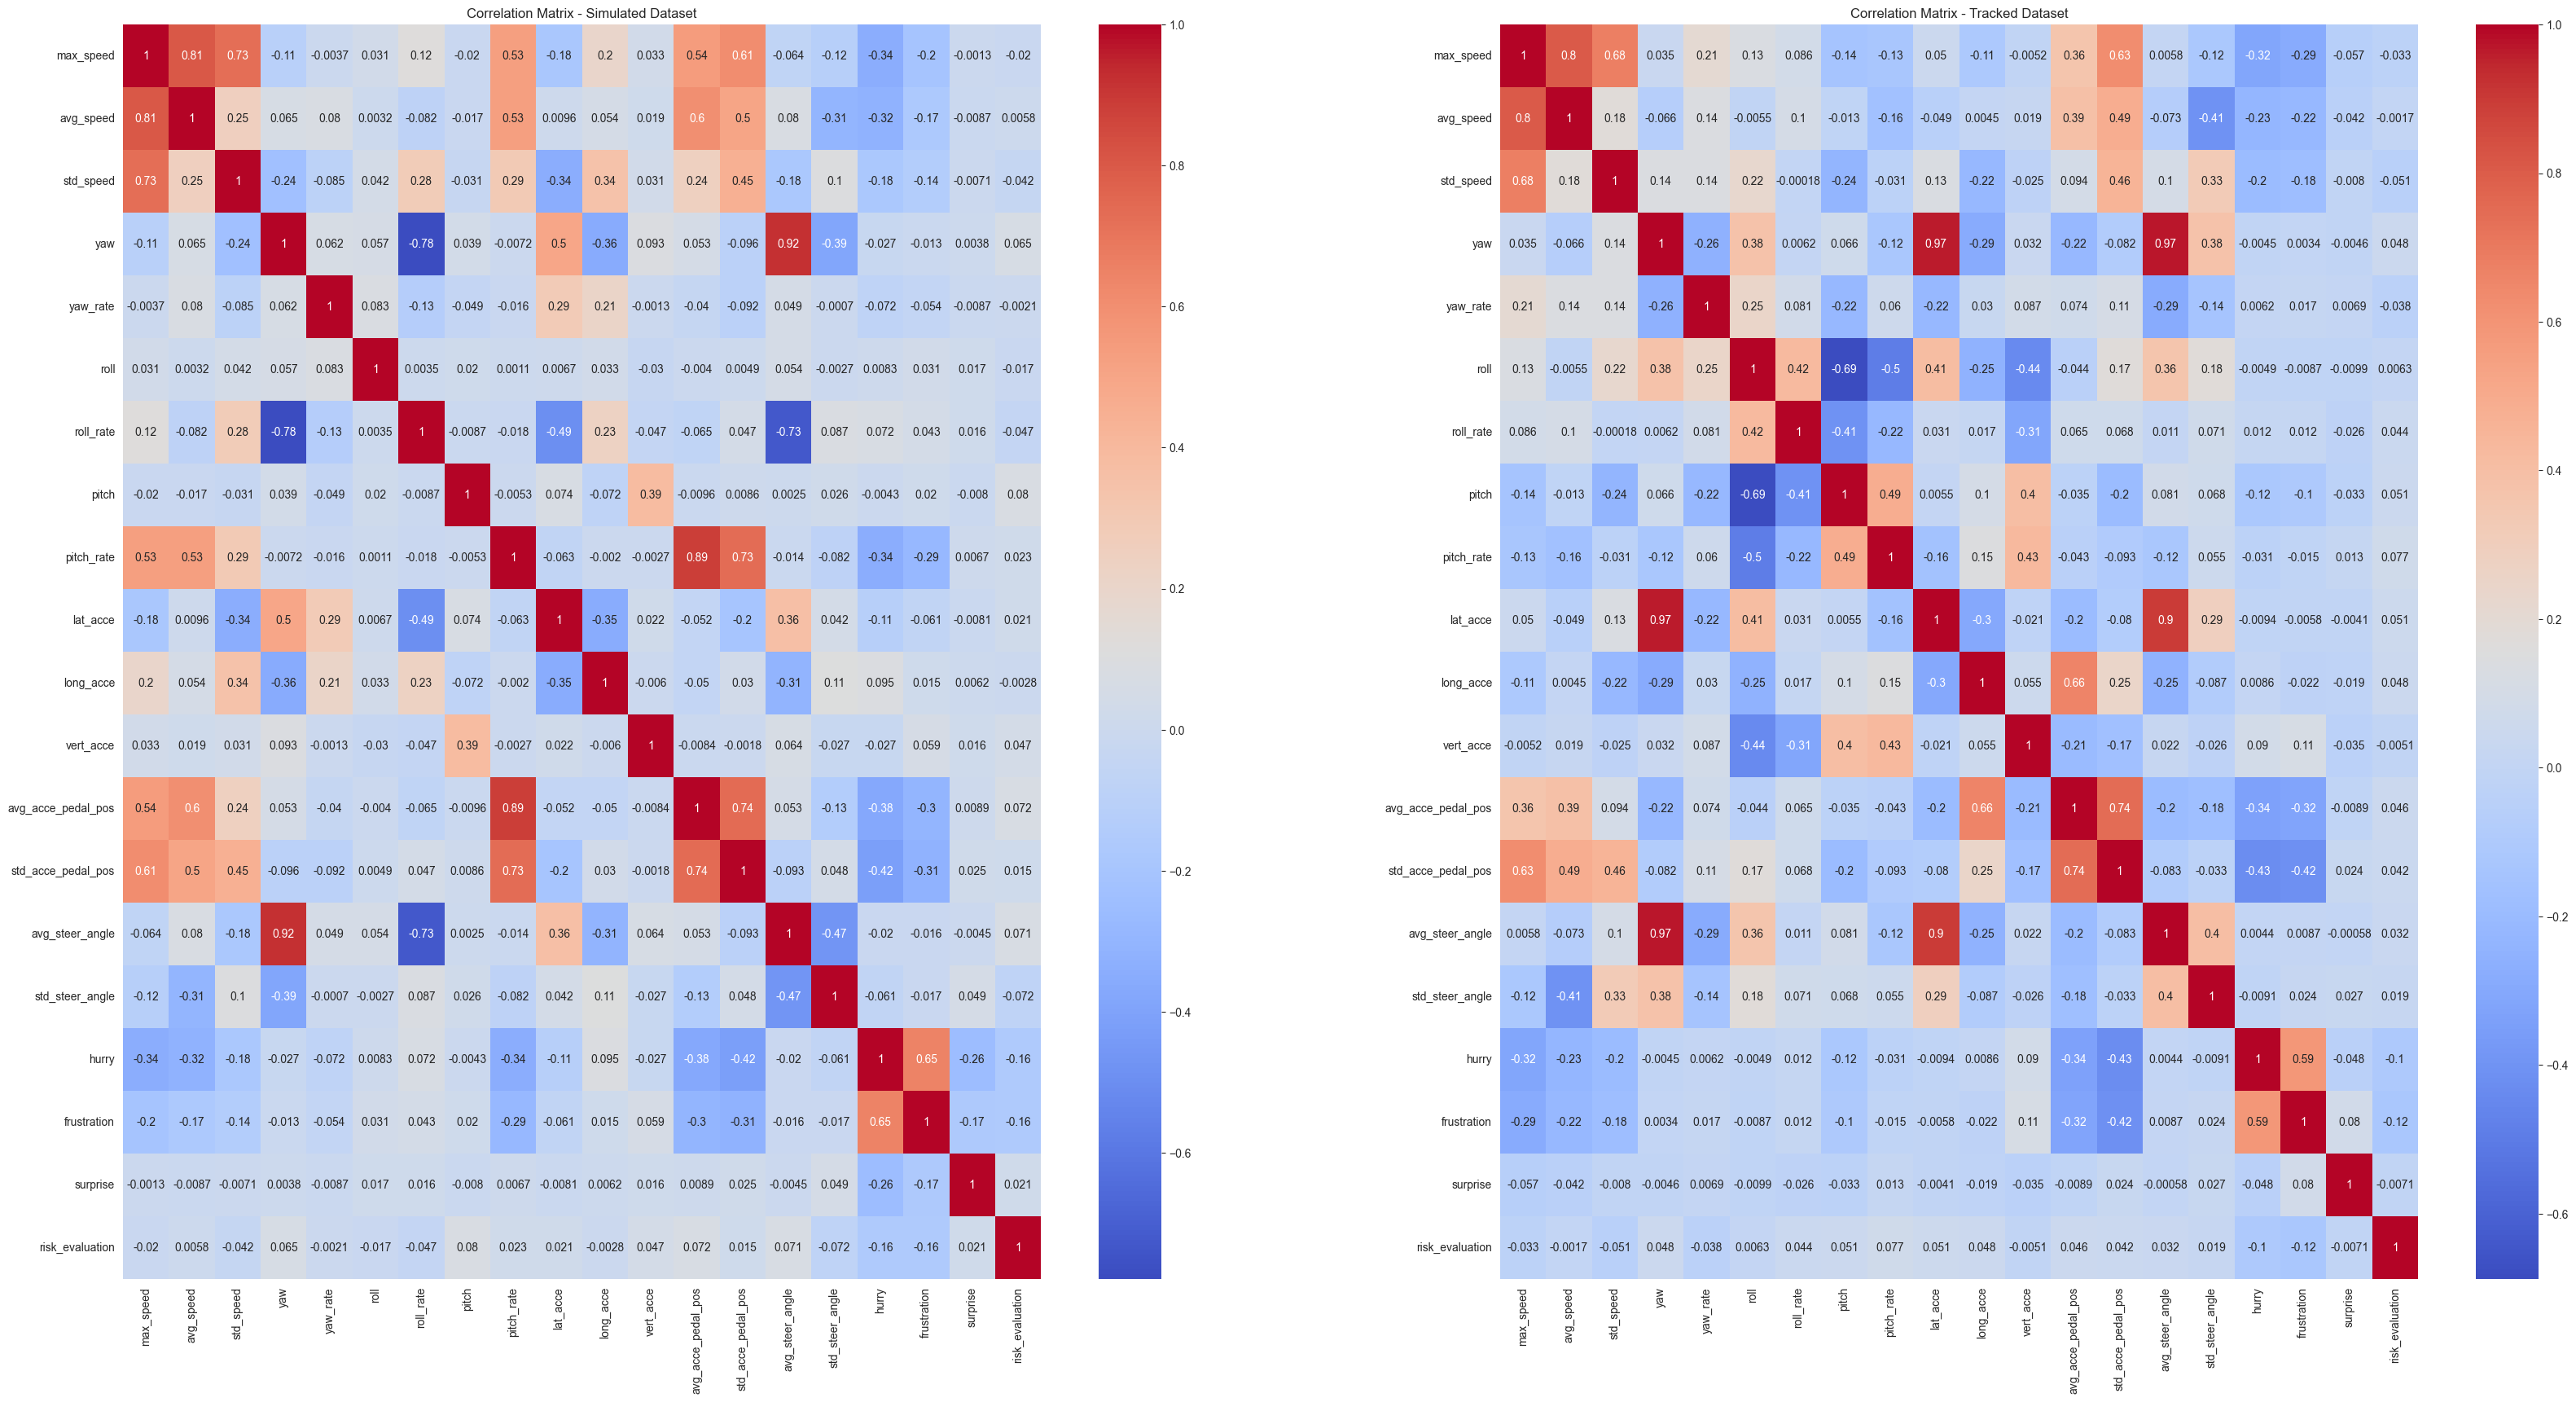

In [19]:
features = vehicular_data_columns + [
    'hurry',
    'frustration',
    'surprise',
    'risk_evaluation'
]
plot_correlation_matrices(simulated_df=feature_simulation_df, tracked_df=feature_track_df, features_to_correlate=features)


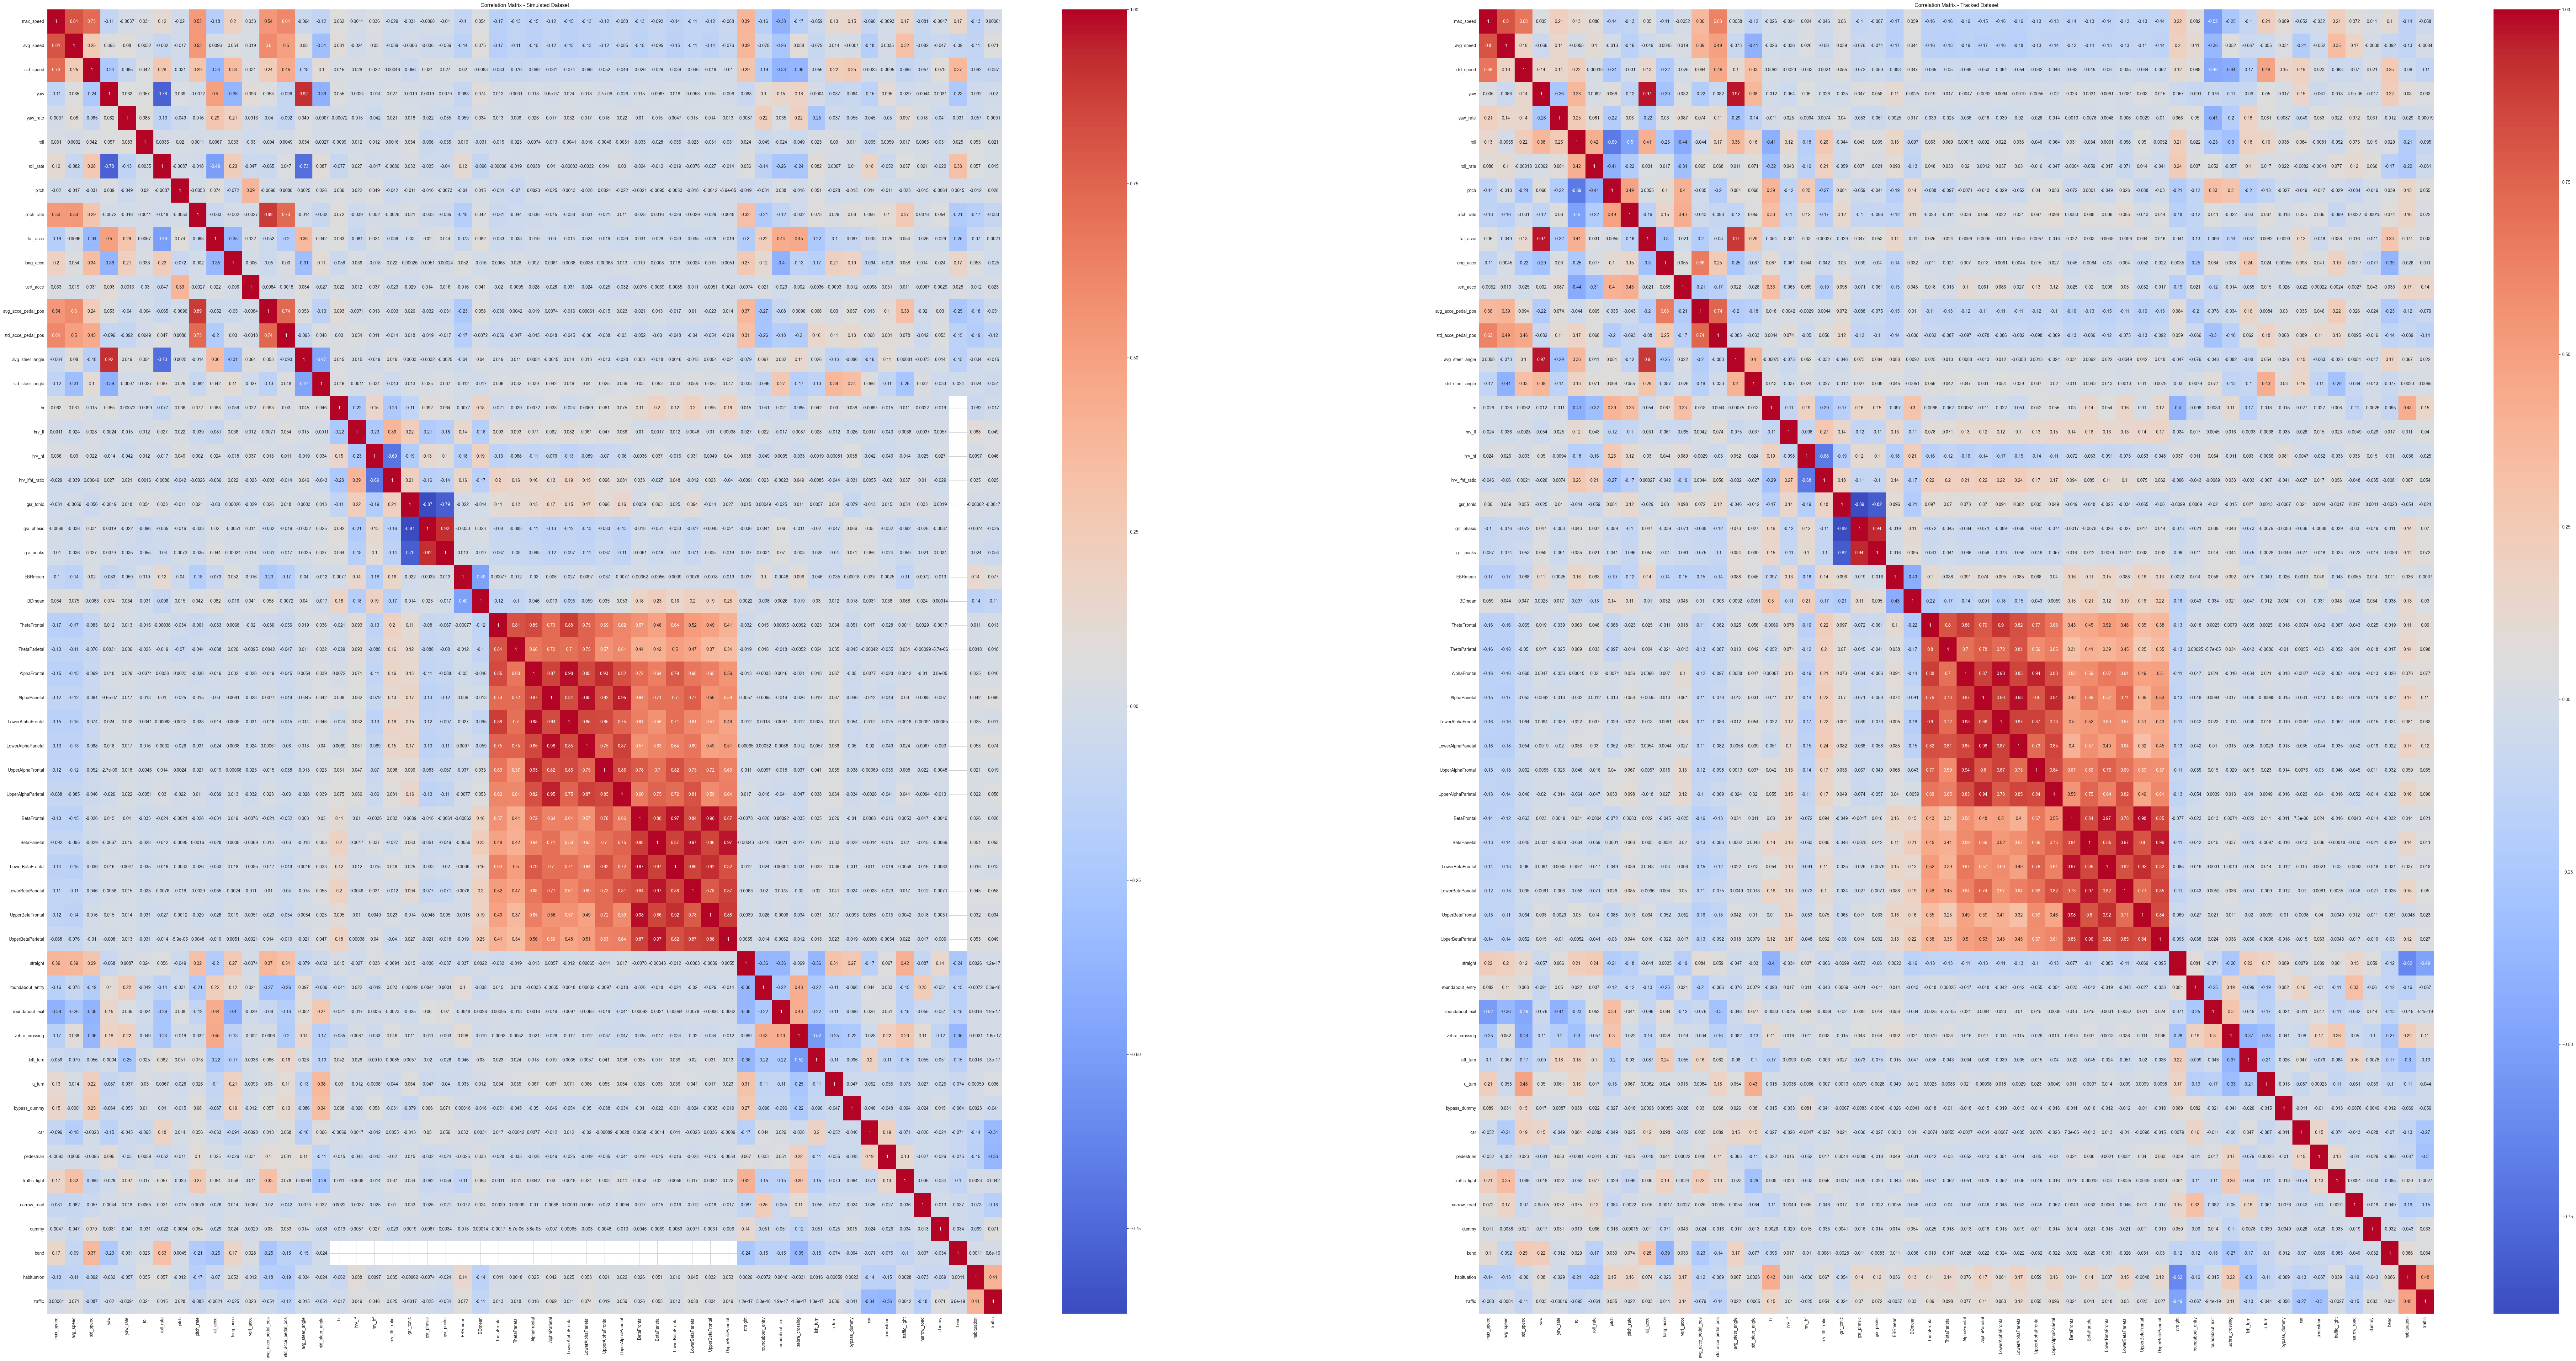

In [20]:
features = vehicular_data_columns + neurophysiological_data_columns + [
    'straight',
    'roundabout_entry',
    'roundabout_exit',
    'zebra_crossing',
    'left_turn',
    'u_turn',
    'bypass_dummy',
    'car',
    'pedestrian',
    'traffic_light',
    'narrow_road',
    'dummy',
    'bend',
    'habituation',
    'traffic'
]
plot_correlation_matrices(simulated_df=feature_simulation_df, tracked_df=feature_track_df, features_to_correlate=features)


In [29]:
feature_track_df['risk_outcome'].value_counts()

1    863
2    193
Name: risk_outcome, dtype: int64

In [31]:
feature_track_df['risk_outcome'].value_counts()


1    863
2    193
Name: risk_outcome, dtype: int64

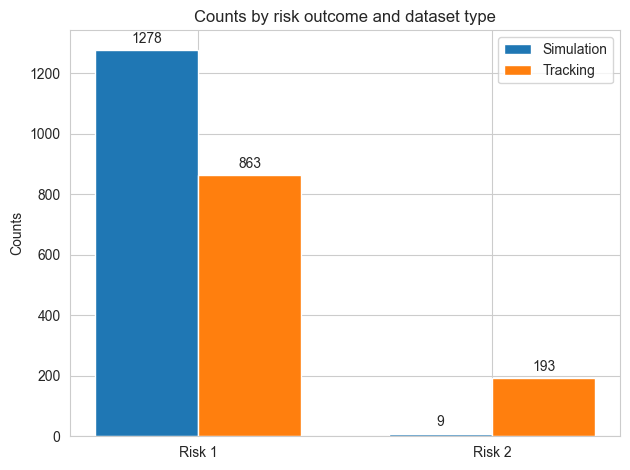

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
simulation_data = [1278, 9]  # Replace with counts of 'risk_evaluation' in simulation data
track_data = [863, 193]       # Replace with counts of 'risk_evaluation' in track data
labels = ['Risk 1', 'Risk 2']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, simulation_data, width, label='Simulation')
rects2 = ax.bar(x + width/2, track_data, width, label='Tracking')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts by risk outcome and dataset type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
